In [2]:
from input.iterator import GraphEdgeIterator
from dscent.iterator import GraphCycleIterator
import networkx as nx
from tqdm.notebook import tqdm
import pickle


In [5]:
meebits = "7bd29408f11d2bfc23c34f18275bbf23bb716bc7"
start_date, end_date = "2021-10-01", "2022-07-01"
omega = 10
workers = 3

In [7]:
with open("input/node_ids.txt") as f:
    for meebits_id, line in enumerate(f.readlines()):
        if line.lower().startswith(meebits):
            break

In [4]:
g = nx.MultiDiGraph()
interactions = GraphEdgeIterator(start_date=start_date, end_date=end_date)

In [ ]:
for cycle in GraphCycleIterator(tqdm(interactions), omega=omega, max_workers=workers):
    *_, u = cycle
    for v in cycle:
        for t in v.timestamps:
            g.add_edge(u.root, v.root, t)
        u = v


In [ ]:
for u, v, t in tqdm(interactions):
    if u == meebits_id or v == meebits_id:
        g.add_edge(u, v, t)

In [ ]:
with open("meebits2.pickle", "wb") as f:
    pickle.dump(g, f)

In [3]:
with open("meebits2.pickle", "rb") as f:
    g = pickle.load(f)

In [12]:
c = nx.node_connected_component(g.to_undirected(), meebits_id)
h = g.subgraph(c)

In [17]:
pos = nx.spring_layout(g)


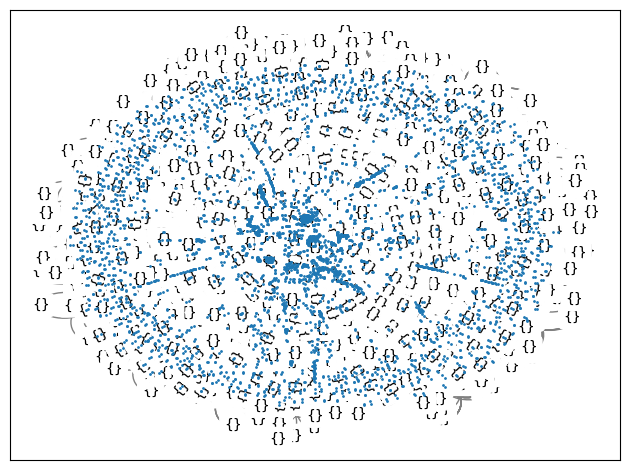

In [19]:
from matplotlib import pyplot as plt
import itertools



fig, ax = plt.subplots()
# Works with arc3 and angle3 connectionstyles
connectionstyle = [f"arc3,rad={r}" for r in itertools.accumulate([0.15] * 4)]
# connectionstyle = [f"angle3,angleA={r}" for r in it.accumulate([30] * 4)]

nx.draw_networkx_nodes(g, pos, ax=ax, node_size=1)
# nx.draw_networkx_labels(g, pos, font_size=20, ax=ax)
nx.draw_networkx_edges(
    g, pos, edge_color="grey", connectionstyle=connectionstyle, ax=ax
)

labels = {
    (u, v, key): str(key)
    for u, v, key in g.edges(keys=True)
}
nx.draw_networkx_edge_labels(
    g,
    pos,
    # labels,
    connectionstyle=connectionstyle,
    # label_pos=0.3,
    # font_color="blue",
    # bbox={"alpha": 0},
    ax=ax,
)

ax.set_title("")
fig.tight_layout()
plt.show()


In [20]:
from  pyvis.network import Network

In [21]:
net = Network()

In [24]:
net.from_nx(g)

In [25]:
meebits_node = net.get_node(meebits_id)
meebits_node["color"] = "orange"

In [28]:
net

<class 'pyvis.network.Network'> |N|=4637 |E|=13,949

In [31]:
net.show("meebits.html", notebook=False)


meebits.html
